# Business Problem
**No-Churn Telecom is an establish Telecom operation in Europe with more than a decade in Business. Due to new players in the Market, telecom industry has become very competitive and retaining customers becoming challenge. 
**In spite of No-Churn initiative for reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) is well above 10%. 
**No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry. 

# Goal

Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [2]:
#Read the csv file in to a data frame using pandas
no_churn=pd.read_csv('telecom_churn_data.csv')

In [3]:
no_churn.info()
no_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
KS           4616 non-null object
 128         4616 non-null int64
 415         4616 non-null int64
 382-4657    4616 non-null object
 no          4616 non-null object
 yes         4616 non-null object
 25          4616 non-null int64
 265.1       4616 non-null float64
 110         4616 non-null int64
 45.07       4616 non-null float64
 197.4       4616 non-null float64
 99          4616 non-null int64
 16.78       4616 non-null float64
 244.7       4616 non-null float64
 91          4616 non-null int64
 11.01       4616 non-null float64
 10          4616 non-null float64
 3           4616 non-null int64
 2.7         4616 non-null float64
 1           4616 non-null int64
 False.      4616 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 757.4+ KB


KS   128   415   382-4657    no   yes   25   265.1   110   45.07  ...   99  \
0  OH   107   415   371-7191    no   yes   26   161.6   123   27.47  ...  103   
1  NJ   137   415   358-1921    no    no    0   243.4   114   41.38  ...  110   
2  OH    84   408   375-9999   yes    no    0   299.4    71   50.90  ...   88   
3  OK    75   415   330-6626   yes    no    0   166.7   113   28.34  ...  122   
4  AL   118   510   391-8027   yes    no    0   223.4    98   37.98  ...  101   

    16.78   244.7   91   11.01    10   3   2.7   1   False.  
0   16.62   254.4  103   11.45  13.7   3  3.70   1   False.  
1   10.30   162.6  104    7.32  12.2   5  3.29   0   False.  
2    5.26   196.9   89    8.86   6.6   7  1.78   2   False.  
3   12.61   186.9  121    8.41  10.1   3  2.73   3   False.  
4   18.75   203.9  118    9.18   6.3   6  1.70   0   False.  

[5 rows x 21 columns]

In [4]:
#we are going to change the data as required as we have a description of the columns in our pdf
no_churn.columns=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']

In [5]:
no_churn.info()
no_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null object
VMail Plan              4616 non-null object
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null

State  Account Length  Area Code      Phone International Plan VMail Plan  \
0    OH             107        415   371-7191                 no        yes   
1    NJ             137        415   358-1921                 no         no   
2    OH              84        408   375-9999                yes         no   
3    OK              75        415   330-6626                yes         no   
4    AL             118        510   391-8027                yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             26     161.6        123       27.47  ...        103       16.62   
1              0     243.4        114       41.38  ...        110       10.30   
2              0     299.4         71       50.90  ...         88        5.26   
3              0     166.7        113       28.34  ...        122       12.61   
4              0     223.4         98       37.98  ...        101       18.75   

   Night Mins  Night Calls  Night Charge  International Mins  \
0       254.4          103         11.45                13.7   
1       162.6          104          7.32                12.2   
2       196.9           89          8.86                 6.6   
3       186.9          121          8.41                10.1   
4       203.9          118          9.18                 6.3   

   International calls  International Charge  CustServ Calls    Churn  
0                    3                  3.70               1   False.  
1                    5                  3.29               0   False.  
2                    7                  1.78               2   False.  
3                    3                  2.73               3   False.  
4                    6                  1.70               0   False.  

[5 rows x 21 columns]

#As there are no missing values in the data we are directly going for some exploratory data 

# Exploratory Data Analysis

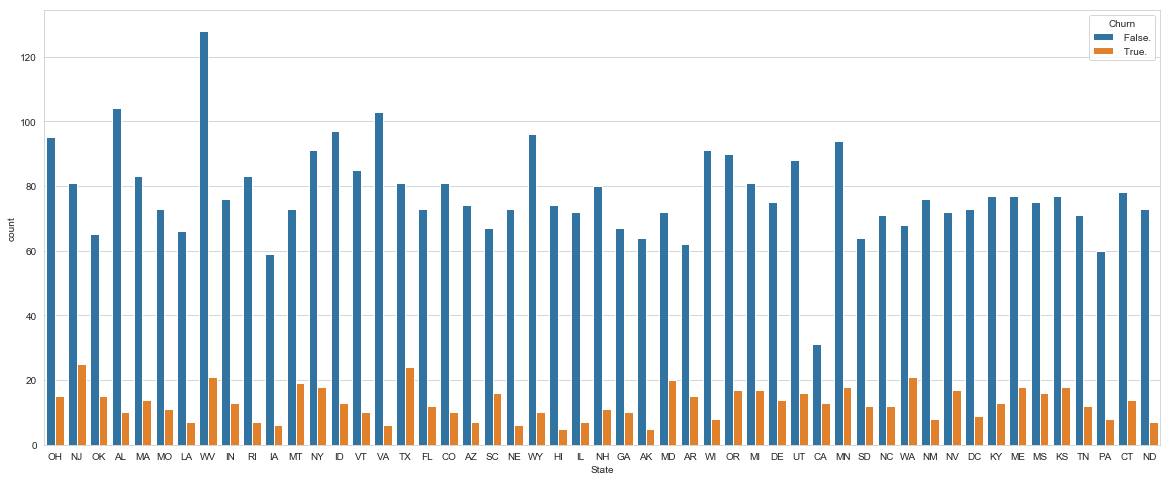

In [6]:
#First lets do some count plots between many categorical columns with respect to the output column
#1.State vs Churn
plt.figure(figsize=(20,8))
sns.countplot('State',hue='Churn',data=no_churn)

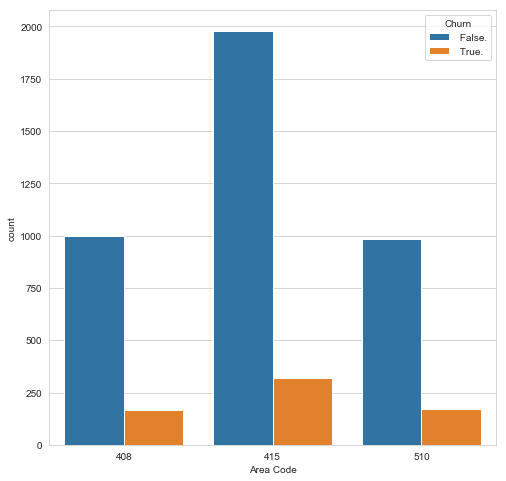

In [7]:
#2. Area Code vs Churn
plt.figure(figsize=(8,8))
sns.countplot('Area Code',hue='Churn',data=no_churn)

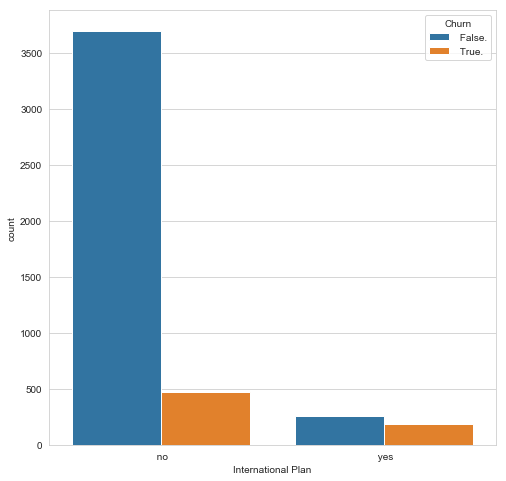

In [8]:
#3. International Plan vs Churn
plt.figure(figsize=(8,8))
sns.countplot('International Plan',hue='Churn',data=no_churn)

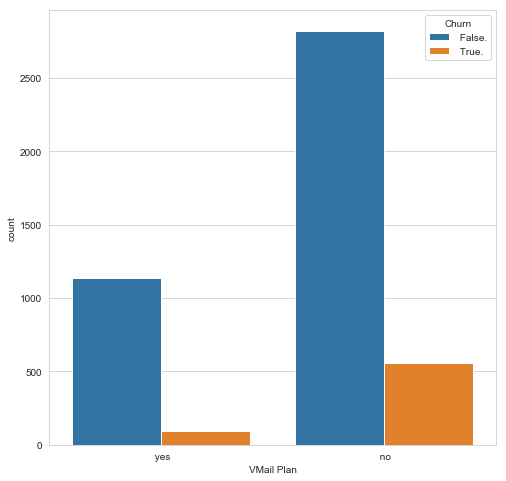

In [9]:
#4.VMail Plan vs Churn
plt.figure(figsize=(8,8))
sns.countplot('VMail Plan',hue='Churn',data=no_churn)

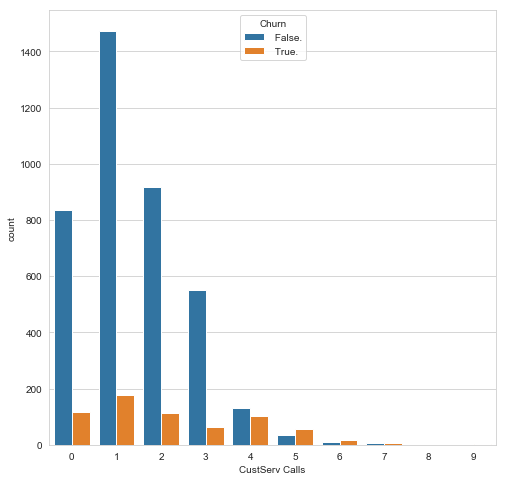

In [10]:
#5. Customer Service calls vs Churn
plt.figure(figsize=(8,8))
sns.countplot('CustServ Calls',hue='Churn',data=no_churn)

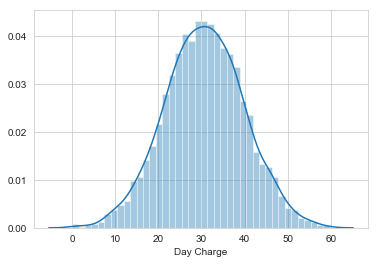

In [11]:
#Lets do some Distplots
sns.distplot(no_churn['Day Charge'],bins=40)

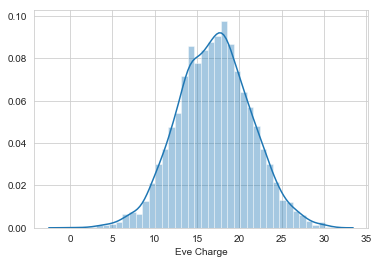

In [12]:
sns.distplot(no_churn['Eve Charge'],bins=40)

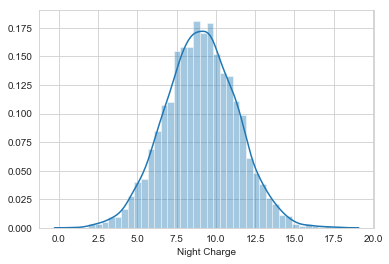

In [13]:
sns.distplot(no_churn['Night Charge'],bins=40)

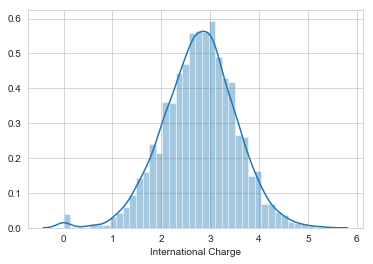

In [14]:
sns.distplot(no_churn['International Charge'],bins=40)

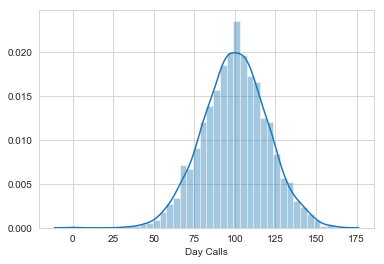

In [15]:
sns.distplot(no_churn['Day Calls'],bins=40)

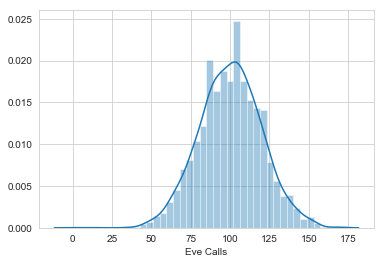

In [16]:
sns.distplot(no_churn['Eve Calls'],bins=40)

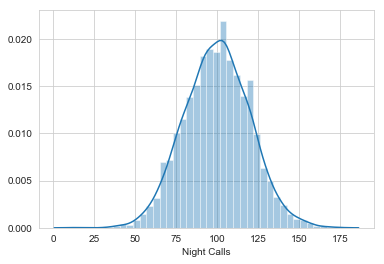

In [17]:
sns.distplot(no_churn['Night Calls'],bins=40)

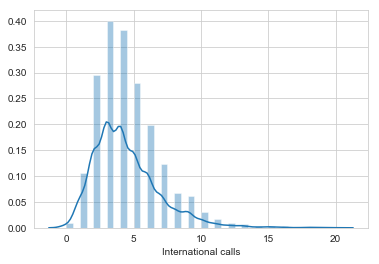

In [19]:
sns.distplot(no_churn['International calls'],bins=40)

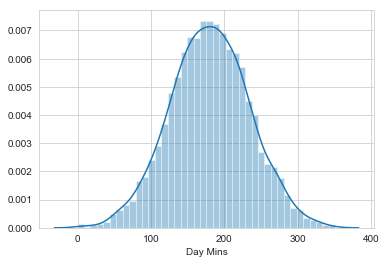

In [20]:
sns.distplot(no_churn['Day Mins'],bins=40)

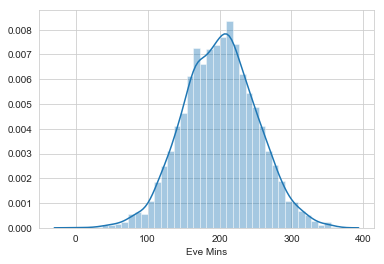

In [21]:
sns.distplot(no_churn['Eve Mins'],bins=40)

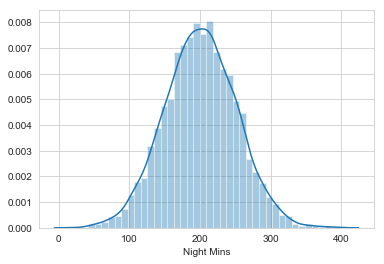

In [22]:
sns.distplot(no_churn['Night Mins'],bins=40)

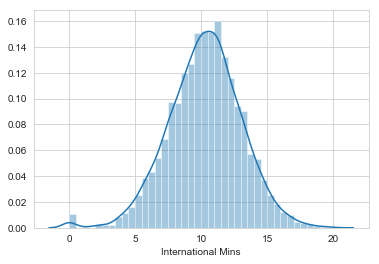

In [23]:
sns.distplot(no_churn['International Mins'],bins=40)

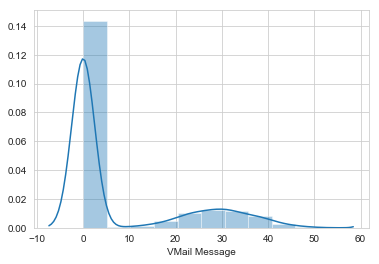

In [27]:
sns.distplot(no_churn['VMail Message'],bins=10)

<Figure size 1440x1440 with 0 Axes>

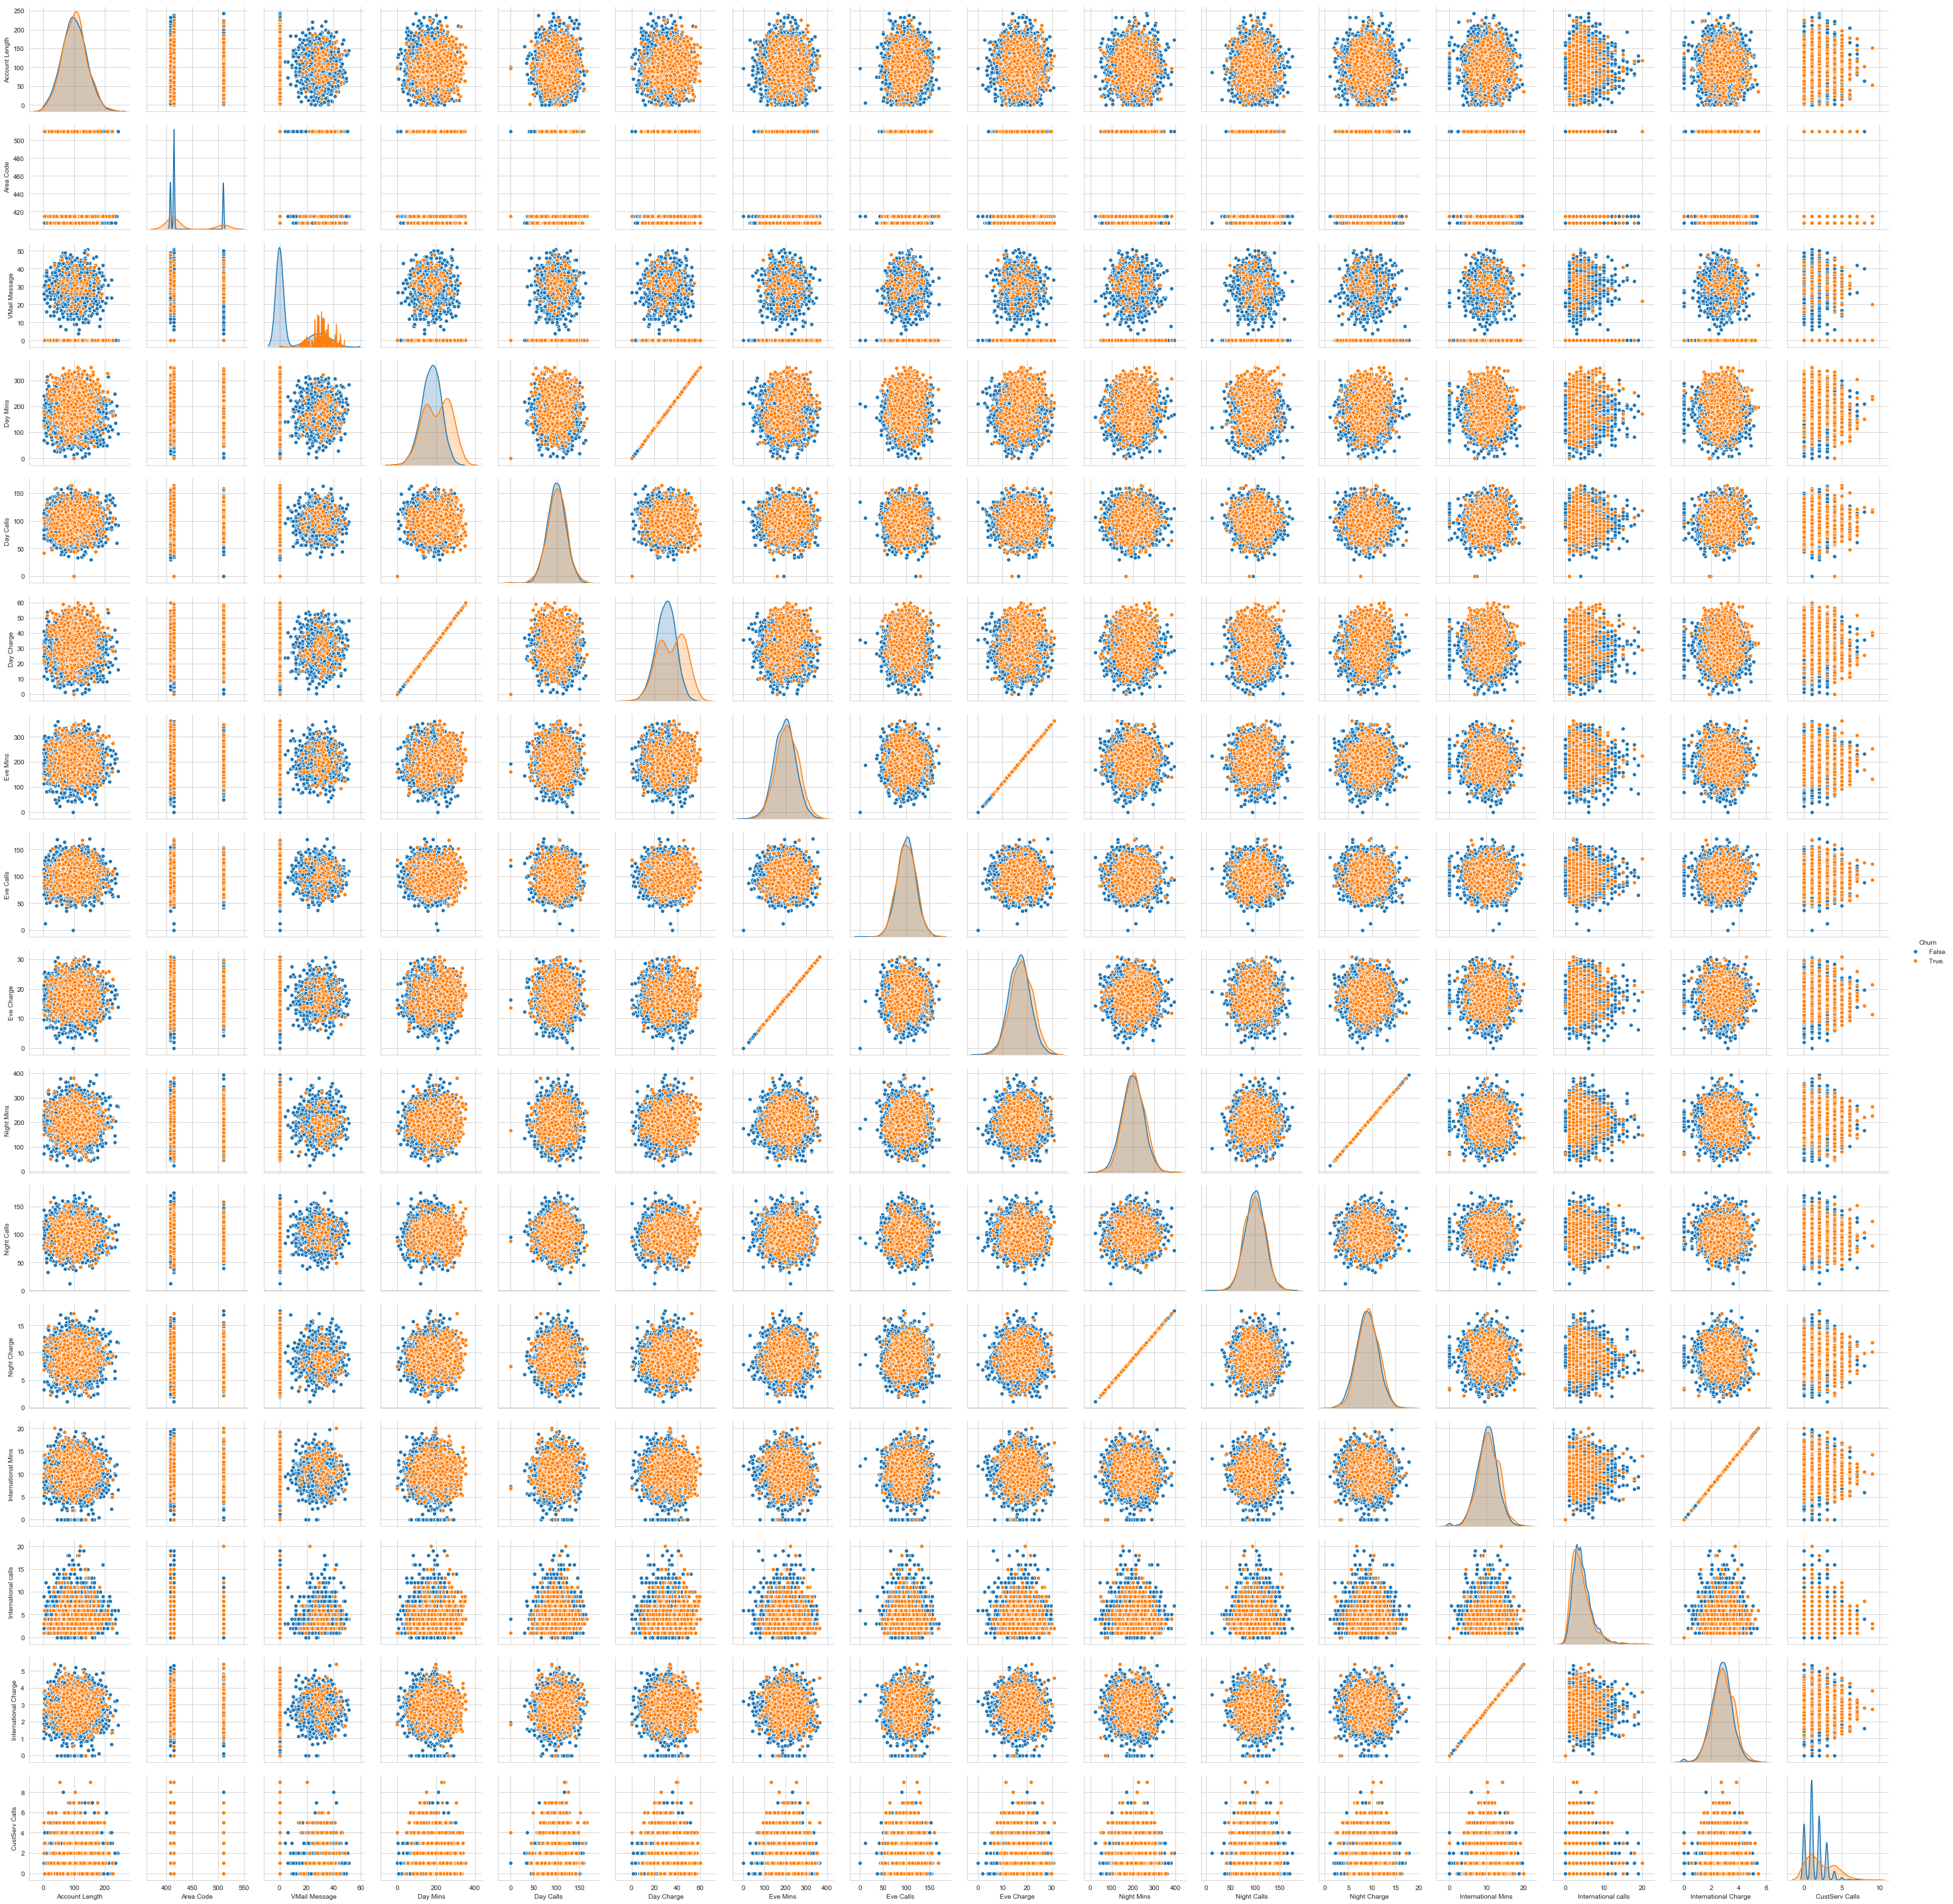

In [28]:
#lets do some Pairplots
plt.figure(figsize=(20,20))
sns.pairplot(no_churn,hue='Churn')

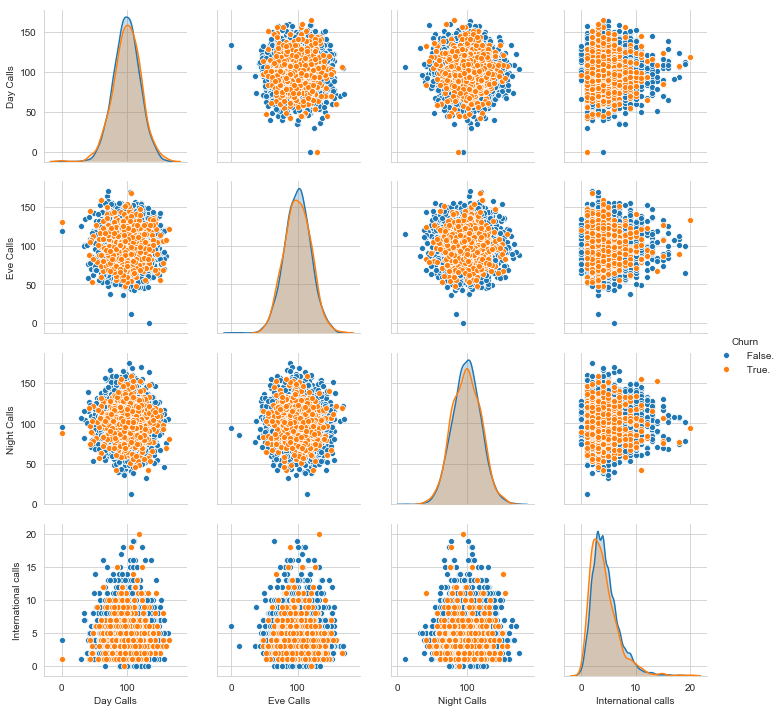

In [29]:
sns.pairplot(no_churn[['Day Calls','Eve Calls','Night Calls','International calls','Churn']],hue='Churn')

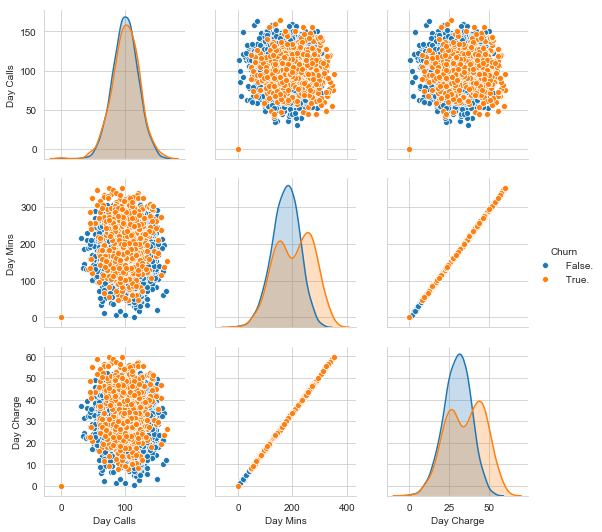

In [30]:
sns.pairplot(no_churn[['Day Calls','Day Mins','Day Charge','Churn']],hue='Churn')

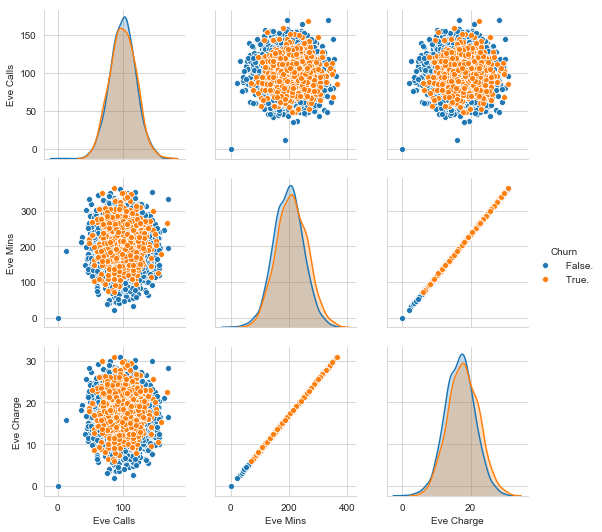

In [31]:
sns.pairplot(no_churn[['Eve Calls','Eve Mins','Eve Charge','Churn']],hue='Churn')

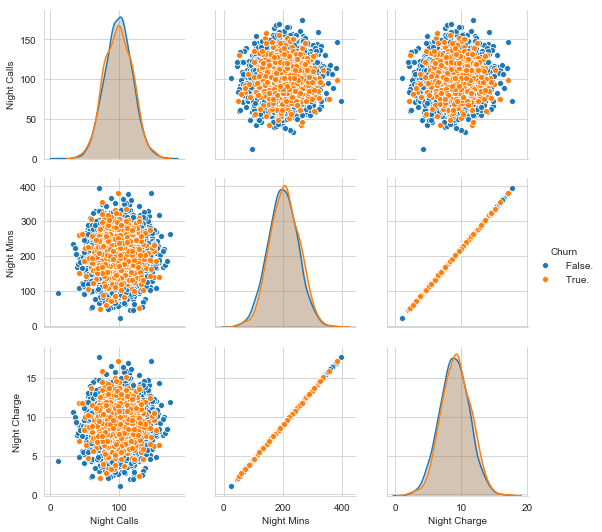

In [32]:
sns.pairplot(no_churn[['Night Calls','Night Mins','Night Charge','Churn']],hue='Churn')

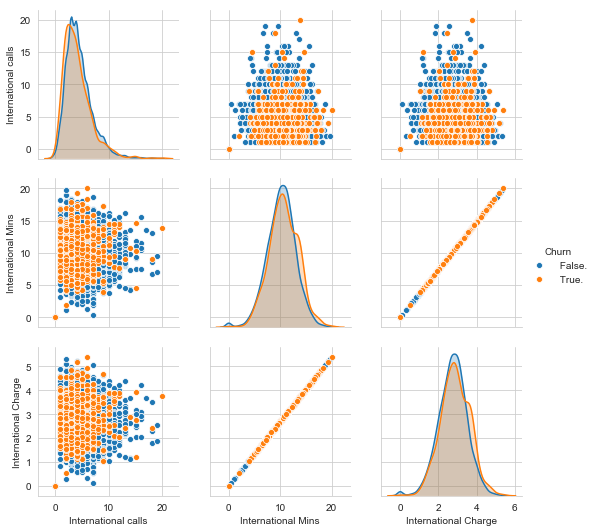

In [33]:
sns.pairplot(no_churn[['International calls','International Mins','International Charge','Churn']],hue='Churn')

In [34]:
no_churn.head()

State  Account Length  Area Code      Phone International Plan VMail Plan  \
0    OH             107        415   371-7191                 no        yes   
1    NJ             137        415   358-1921                 no         no   
2    OH              84        408   375-9999                yes         no   
3    OK              75        415   330-6626                yes         no   
4    AL             118        510   391-8027                yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             26     161.6        123       27.47  ...        103       16.62   
1              0     243.4        114       41.38  ...        110       10.30   
2              0     299.4         71       50.90  ...         88        5.26   
3              0     166.7        113       28.34  ...        122       12.61   
4              0     223.4         98       37.98  ...        101       18.75   

   Night Mins  Night Calls  Night Charge  International Mins  \
0       254.4          103         11.45                13.7   
1       162.6          104          7.32                12.2   
2       196.9           89          8.86                 6.6   
3       186.9          121          8.41                10.1   
4       203.9          118          9.18                 6.3   

   International calls  International Charge  CustServ Calls    Churn  
0                    3                  3.70               1   False.  
1                    5                  3.29               0   False.  
2                    7                  1.78               2   False.  
3                    3                  2.73               3   False.  
4                    6                  1.70               0   False.  

[5 rows x 21 columns]

In [35]:
#Dropping the unnecessary columns
no_churn.drop(['Account Length','Phone'],axis=1,inplace = True)

# Assigining the Input and Output Variables

For Assigining inputs wefirst need to go through a scalar and also encode the categorical values

In [36]:
#Applying Standard Scalar to the required inputs
x=no_churn.drop(['State','Area Code','International Plan',
                 'VMail Plan','CustServ Calls','Churn'],axis=1)   #Store the required inputs to a variable
from sklearn.preprocessing import StandardScaler #import standard scalar
sc=StandardScaler() #define Standard scalar
x=sc.fit_transform(x) # aplly standard scalar on the dataframe
x=pd.DataFrame(x,columns=['VMail Message','Day Mins','Day Calls','Day Charge',#As the transformed values will be in a matrix
                          'Eve Mins','Eve Calls','Eve Charge','Night Mins',   #we convert it into a dataframe   
                          'Night Calls','Night Charge','International Mins',
                          'International calls','International Charge'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
x.head()

VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0       1.335823 -0.348881   1.154171   -0.349162 -0.097509   0.142270   
1      -0.577351  1.166800   0.701511    1.166964 -1.567138   0.495425   
2      -0.577351  2.204429  -1.461196    2.204600 -2.740072  -0.614492   
3      -0.577351 -0.254383   0.651216   -0.254336 -1.031109   1.100834   
4      -0.577351  0.796218  -0.103217    0.796379  0.398961   0.041368   

   Eve Charge  Night Mins  Night Calls  Night Charge  International Mins  \
0   -0.096981    1.064230     0.153198      1.065050            1.240552   
1   -1.567661   -0.752172     0.203362     -0.750893            0.696553   
2   -2.740482   -0.073495    -0.549098     -0.073761           -1.334377   
3   -1.030118   -0.271360     1.056150     -0.271624           -0.065046   
4    0.398676    0.065011     0.905658      0.066941           -1.443176   

   International calls  International Charge  
0            -0.583572              1.241325  
1             0.230255              0.690555  
2             1.044083             -1.337891  
3            -0.583572             -0.061716  
4             0.637169             -1.445359

In [38]:
#now lets label encode the categorical terms of the no_churn inputs
from sklearn.preprocessing import LabelEncoder #import the library
le = LabelEncoder() #define the label encoder
temp=['State','Area Code','International Plan','VMail Plan'] #names of the columns you need to encode store it in
                                                            #a temporary variable
for i in temp:  # start the loop
    no_churn[i]=le.fit_transform(no_churn[i]) # fit transform the variables according to the assigned i value

In [39]:
#Now lets assign the encoded categorical values in to the input variable x
temp=['State','Area Code','International Plan','VMail Plan','CustServ Calls']
for i in temp:
    x[i]=no_churn[i]  #Assigning the encoded categorical columns in to the input
#check the head of input x
x.head()

VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0       1.335823 -0.348881   1.154171   -0.349162 -0.097509   0.142270   
1      -0.577351  1.166800   0.701511    1.166964 -1.567138   0.495425   
2      -0.577351  2.204429  -1.461196    2.204600 -2.740072  -0.614492   
3      -0.577351 -0.254383   0.651216   -0.254336 -1.031109   1.100834   
4      -0.577351  0.796218  -0.103217    0.796379  0.398961   0.041368   

   Eve Charge  Night Mins  Night Calls  Night Charge  International Mins  \
0   -0.096981    1.064230     0.153198      1.065050            1.240552   
1   -1.567661   -0.752172     0.203362     -0.750893            0.696553   
2   -2.740482   -0.073495    -0.549098     -0.073761           -1.334377   
3   -1.030118   -0.271360     1.056150     -0.271624           -0.065046   
4    0.398676    0.065011     0.905658      0.066941           -1.443176   

   International calls  International Charge  State  Area Code  \
0            -0.583572              1.241325     35          1   
1             0.230255              0.690555     31          1   
2             1.044083             -1.337891     35          0   
3            -0.583572             -0.061716     36          1   
4             0.637169             -1.445359      1          2   

   International Plan  VMail Plan  CustServ Calls  
0                   0           1               1  
1                   0           0               0  
2                   1           0               2  
3                   1           0               3  
4                   1           0               0

In [40]:
#lets Assign output variable y
y=no_churn['Churn']

# Builiding the Model

#Importing the required library

In [46]:
from sklearn.model_selection import train_test_split #import the train and test split library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101) #defining the training and
                                                                    #testing data variables in to the respective variables.

In [47]:
from sklearn.ensemble import RandomForestClassifier #import a required Classifier
rfc=RandomForestClassifier(100) #define the Classifier

Now here we are checking the relative importance of the input columns with respect to the output columns as shown below

Text(0.5, 0, 'Relative Importance')

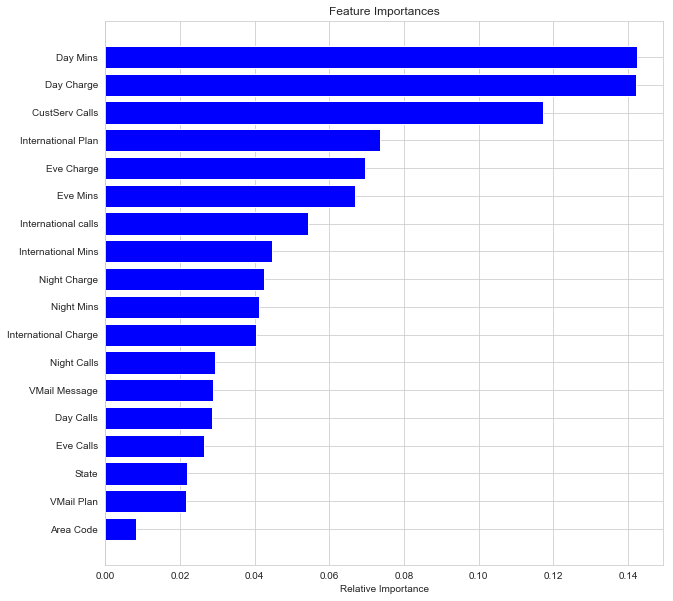

In [48]:
rfc.fit(x_train,y_train) #training the model
features=x.columns
importances = rfc.feature_importances_ #taking the feature importance values into the a variable
indices = np.argsort(importances)
plt.figure(figsize=(10,10)) #plotting these in to a horizontal barplot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [49]:
Churn_Flag=rfc.predict(x_test) #getting the Predictions

In [50]:
# Here we are checking the Classfication report ,Confusion matrix and accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,Churn_Flag))
print(confusion_matrix(y_test,Churn_Flag))
print(accuracy_score(y_test,Churn_Flag))

              precision    recall  f1-score   support

      False.       0.96      1.00      0.98       782
       True.       0.98      0.79      0.88       142

   micro avg       0.97      0.97      0.97       924
   macro avg       0.97      0.89      0.93       924
weighted avg       0.97      0.97      0.96       924

[[780   2]
 [ 30 112]]
0.9653679653679653


# Conclusion